## Importación de Librerías

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
from pandas.core.frame import DataFrame

## Dataset

In [116]:
MAIN_PATH: str = "/content/video_games_sales.csv"
df = pd.read_csv(MAIN_PATH)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#FASE 1 : COMPRENDER EL NEGOCIO

Analizaremos el dataset de ventas de videojuegos para entender el comportamiento de las ventas y proporcionar recomendaciones estratégicas para desarrolladores de videojuegos.

- El objetivo es analizar las ventas de videojuegos para identificar tendencias y patrones que puedan ayudar a los desarrolladores a maximizar sus ventas.
- Se considerarán las siguientes dimensiones:

Ventas por año
Clase de juego (género)
Plataforma
Desarrollador
País (región de ventas)
Publicador
Puntajes (críticos y usuarios)

#FASE 2: Entendimiento de los datos

In [117]:
df.shape

(16719, 16)

Con este codigo revisamos el tamaño del set y los tipos de datos que hay en cada columna. El dataset consta de 16719 filas repartidas en 16 columnas

In [118]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

## Traducción de las Columnas

Acá lo que hice fue facilitar la comprensión de los datos a traves de la traducción de las columnas, ya que me cuesta el inglés xd

In [123]:
traduccion_columnas = {
    'Name':'Título',
    'Platform': 'Plataforma',
    'Year_of_Release': 'Año_de_Lanzamiento',
    'Genre': 'Género',
    'Publisher': 'Editor',
    'NA_Sales': 'Ventas_NA',
    'EU_Sales': 'Ventas_EU',
    'JP_Sales': 'Ventas_JP',
    'Other_Sales': 'Otras_Ventas',
    'Global_Sales': 'Ventas_Globales',
    'Critic_Score': 'Puntuación_Crítica',
    'Critic_Count': 'Número_de_Críticos',
    'User_Score': 'Puntuación_Usuarios',
    'User_Count': 'Número_de_Usuarios',
    'Developer': 'Desarrollador',
    'Rating': 'Clasificación'
}

# Acá se renombran las columnas del DataFrame
df.rename(columns=traduccion_columnas, inplace=True)

# Acá se imprimen las nuevas columnas del DataFrame
print("Nuevos nombres de las columnas:")
print(df.columns)


Nuevos nombres de las columnas:
Index(['Título', 'Plataforma', 'Año_de_Lanzamiento', 'Género', 'Editor',
       'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas',
       'Ventas_Globales', 'Puntuación_Crítica', 'Número_de_Críticos',
       'Puntuación_Usuarios', 'Número_de_Usuarios', 'Desarrollador',
       'Clasificación'],
      dtype='object')


El dataset incluye las siguientes columnas:

- Título: Nombre del videojuego.
- Plataforma: Plataforma en la que se lanzó el juego (Wii, NES, etc.).
- Año_de_Lanzamiento: Año en que se lanzó el juego.
- Género: Género del videojuego (Sports, Platform, Racing, etc.).
- Editor: Compañía que publicó el juego.
- Ventas_NA: Ventas en América del Norte (en millones).
- Ventas_EU: Ventas en Europa (en millones).
- Ventas_JP: Ventas en Japón (en millones).
- Otras_Ventas: Ventas en el resto del mundo (en millones).
- Ventas_Globales: Ventas totales a nivel mundial (en millones).
- Puntuación_Crítica: Puntuación media de los críticos.
- Número_de_Críticos: Número de críticos que dieron una puntuación.
- Puntuación_Usuarios: Puntuación media de los usuarios.
- Número_de_Usuarios: Número de usuarios que dieron una puntuación.
- Desarrollador: Compañía que desarrolló el juego.
- Clasificación: Clasificación del juego (E, T, M, etc.).

## Cabeza del Dataset

Entiendo que el dataset se compone de diferentes datos sobre los títulos de los juegos y que en este se resaltan las ventas, ya que su valor se encuentra en decimales.

In [66]:
df.head(10)

,Título,Plataforma,Año_de_Lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Ventas_Globales,Puntuación_Crítica,Número_de_Críticos,Puntuación_Usuarios,Número_de_Usuarios,Desarrollador,Clasificación
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Se extrae una muestra aleatoria de todo el set de datos con tamaño de 10 filas

## Estadística del Dataset

In [67]:
df.describe()

,Año_de_Lanzamiento,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Ventas_Globales,Puntuación_Crítica,Número_de_Críticos,Número_de_Usuarios
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Año de Lanzamiento:** La dispersión de estos datos es alta y indica que el lanzamiento de los juegos fue constante a lo largo de los años.

**Ventas en General:** Hay una gran variabilidad en las ventas, indicando fracaso y éxito de los juegos de forma extrema.

**Puntuaciones Críticas:** A pesar de que la escala va del cero al cien, el valor mínimo de puntuación es de 13; ningún juego fue aplastado por la crítica, la mayoría de juegos tiene una calidad moderada, ya que la puntuación media es de 69 puntos.

**Número de Críticos y Usuarios:** Hay más críticos que usuarios, pero la concentración de usuarios resulta más dispersa. Hay juegos mucho más populares que otros. Esto provoca una concentración de usuarios en ciertos juegos, en cambio los críticos no tienen tanta variación y la mayor parte del tiempo los juegos tienen la misma cantidad de críticos.

## Información del Dataset

El Dataset cuenta con 16 columnas y 16.719 filas, con 3 tipos de datos distintos y por ahora no cuenta con ningún nulo.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Título               16717 non-null  object 
 1   Plataforma           16719 non-null  object 
 2   Año_de_Lanzamiento   16450 non-null  float64
 3   Género               16717 non-null  object 
 4   Editor               16665 non-null  object 
 5   Ventas_NA            16719 non-null  float64
 6   Ventas_EU            16719 non-null  float64
 7   Ventas_JP            16719 non-null  float64
 8   Otras_Ventas         16719 non-null  float64
 9   Ventas_Globales      16719 non-null  float64
 10  Puntuación_Crítica   8137 non-null   float64
 11  Número_de_Críticos   8137 non-null   float64
 12  Puntuación_Usuarios  10015 non-null  object 
 13  Número_de_Usuarios   7590 non-null   float64
 14  Desarrollador        10096 non-null  object 
 15  Clasificación        9950 non-null  

## Valores Nulos

Acá compruebo si es cierta la ausencia de valores nulos.

In [119]:

valores_nulos_por_columna = df.isna().sum()

total_nulos = valores_nulos_por_columna.sum()

porcentaje_nulos = (total_nulos / df.size) * 100

print("Valores nulos por columna:")
print(valores_nulos_por_columna)
print("\nTotal de valores nulos en todo el DataFrame:", total_nulos)
print("Porcentaje total de valores nulos en el DataFrame:", porcentaje_nulos, "%")

Valores nulos por columna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Total de valores nulos en todo el DataFrame: 46716
Porcentaje total de valores nulos en el DataFrame: 17.46366409474251 %


Existe una cantidad significativa de valores nulos en las puntuaciones de los críticos y los usuarios, así como en las clasificaciones de los juegos y sus desarrolladores.

Sospechamos que los juegos más antiguos presentan una mayor cantidad de valores nulos en las categorías de desarrolladores y clasificación. Esto podría deberse a la disolución de las compañías desarrolladoras, la pérdida de información sobre el juego, o el desconocimiento del público general sobre la temática del juego.

## OUTLIERS

In [69]:
columnas_numericas = ['Año_de_Lanzamiento', 'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas', 'Ventas_Globales', 'Puntuación_Crítica', 'Número_de_Críticos', 'Número_de_Usuarios']

for column in df[columnas_numericas].columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        outliers_count = outliers.sum()
        outliers_percentage = outliers.mean() * 100

        print(f"Columna '{column}' tiene {outliers_count} outliers.")
        print(f"Porcentaje de outliers: {outliers_percentage:.2f}%")
        print("---")

total_outliers = sum(outliers.sum() for column in df.columns)
total_entries = len(df) * len(df.columns)
total_percentage = total_outliers / total_entries * 100

print(f"Porcentaje total de outliers en todo el dataset: {total_percentage:.2f}%")
print(f"Cantidad total de outliers en todo el dataset: {total_outliers}")

Columna 'Año_de_Lanzamiento' tiene 305 outliers.
Porcentaje de outliers: 1.82%
---
Columna 'Ventas_NA' tiene 1687 outliers.
Porcentaje de outliers: 10.09%
---
Columna 'Ventas_EU' tiene 2061 outliers.
Porcentaje de outliers: 12.33%
---
Columna 'Ventas_JP' tiene 2434 outliers.
Porcentaje de outliers: 14.56%
---
Columna 'Otras_Ventas' tiene 2243 outliers.
Porcentaje de outliers: 13.42%
---
Columna 'Ventas_Globales' tiene 1892 outliers.
Porcentaje de outliers: 11.32%
---
Columna 'Puntuación_Crítica' tiene 83 outliers.
Porcentaje de outliers: 0.50%
---
Columna 'Número_de_Críticos' tiene 251 outliers.
Porcentaje de outliers: 1.50%
---
Columna 'Número_de_Usuarios' tiene 1080 outliers.
Porcentaje de outliers: 6.46%
---
Porcentaje total de outliers en todo el dataset: 6.46%
Cantidad total de outliers en todo el dataset: 17280


Existe una cantidad moderada de valores atípicos. Estos se concentran en las columnas de ventas, lo que nuevamente confirma la irregularidad de los datos y el éxito o fracaso extremo de los juegos.

## Tabla de Frecuencia de Ventas por Década

In [70]:
intervalos = range(1980, 2030, 10)
# Este comienza en 1980, termina en 2025, intervalos de 10 años.



# Crear etiquetas para los intervalos.
etiquetas_intervalos = [f'{inicio}-{inicio+9}' for inicio in intervalos]


# Agrupar los datos por intervalo de años y calcular las frecuencias y sumas.
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Años', 'Cantidad Ventas por Intervalo', 'Ventas Globales'])


for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Año_de_Lanzamiento'] >= inicio) & (df['Año_de_Lanzamiento'] <= fin)
    ventas_globales = df.loc[filtro, 'Ventas_Globales'].sum()
    cantidad_anios = filtro.sum()
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_anios, ventas_globales]


# Mostrar la tabla de frecuencia.
print(tabla_frecuencia.to_string(index=False))

Intervalo de Años  Cantidad Ventas por Intervalo  Ventas Globales
        1980-1989                            205           376.58
        1990-1999                           1771          1281.31
        2000-2009                           9193          4617.98
        2010-2019                           5280          2545.18


He dividido los años en intervalos de décadas. Se observa que el auge de ventas y ganancias ocurrió en la década de 2000-2009, casi duplicando el éxito de la década siguiente y superando ampliamente las ventas de las dos décadas iniciales. No estoy segura de por qué sucede esto, pero lo examinaré con más detalle más adelante.

## Gráfico de Ventas Globales por Intervalo de Años

Acá grafique la tabla de frecuencia.

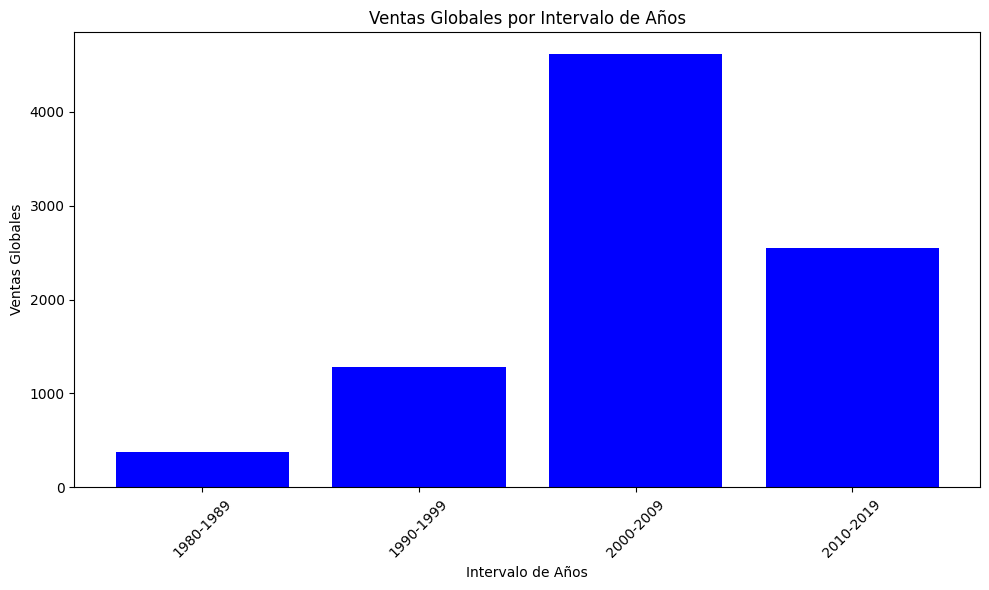

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(tabla_frecuencia['Intervalo de Años'], tabla_frecuencia['Ventas Globales'], color='blue')
plt.xlabel('Intervalo de Años')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales por Intervalo de Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que las ventas durante la década de 2000-2009 dominan significativamente en comparación con el resto de las décadas.

## Tabla de frecuencia de ventas en norte américa por década

In [15]:
intervalos = range(1980, 2030, 10)
# Empieza en 1980, termina en 2025, intervalos de 10 años.


# Crear etiquetas para los intervalos
etiquetas_intervalos = [f'{inicio}-{inicio+9}' for inicio in intervalos]


# Agrupar los datos por intervalo de años y calcular las frecuencias y sumas
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Años', 'Cantidad Ventas por Intervalo', 'Ventas en Norte América'])


for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Año_de_Lanzamiento'] >= inicio) & (df['Año_de_Lanzamiento'] <= fin)
    ventas_totales = df.loc[filtro, 'Ventas_NA'].sum()
    cantidad_anios = filtro.sum()
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_anios, ventas_totales]


# Mostrar la tabla de frecuencia
print(tabla_frecuencia.to_string(index=False))

Intervalo de Años  Cantidad Ventas por Intervalo  Ventas en Norte América
        1980-1989                            205                   235.66
        1990-1999                           1771                   577.93
        2000-2009                           9193                  2399.20
        2010-2019                           5280                  1130.41


Se observa nuevamente que las ventas y ganancias alcanzaron su punto máximo en la década de 2000-2009, casi duplicando el éxito de la década siguiente y superando ampliamente las ventas de las dos décadas anteriores. Las ventas en Norteamérica son menores que las ventas globales, aunque representaron casi la mitad de las ventas mundiales durante los años 2000-2009.

## Tabla de Frecuencia de Ventas en Norte América por Intervalo de años

Acá lo que hice fue graficar la tabla de frecuencia.

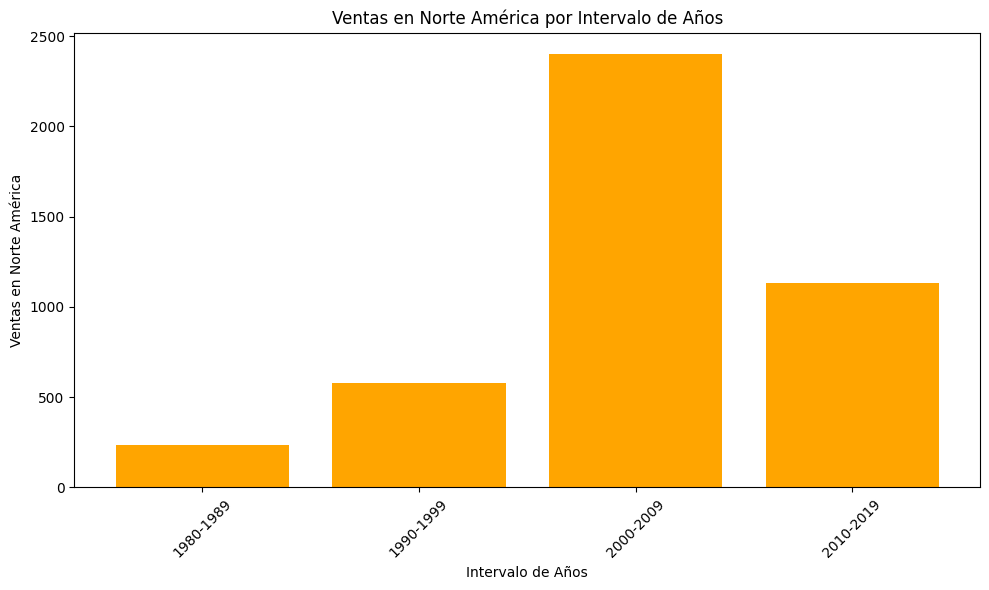

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(tabla_frecuencia['Intervalo de Años'], tabla_frecuencia['Ventas en Norte América'], color='orange')
plt.xlabel('Intervalo de Años')
plt.ylabel('Ventas en Norte América')
plt.title('Ventas en Norte América por Intervalo de Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa una tendencia en las ventas, siendo estas mayores en los años posteriores a la década de 2000.

## Tabla de Frecuencia de Ventas Europeas por Década

In [17]:
intervalos = range(1980, 2030, 10)  # Empieza en 1980, termina en 2025, intervalos de 5 años

# Crear etiquetas para los intervalos
etiquetas_intervalos = [f'{inicio}-{inicio+9}' for inicio in intervalos]

# Agrupar los datos por intervalo de años y calcular las frecuencias y sumas
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Años', 'Cantidad de ventas por intervalo', 'Ventas Europeas'])

for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Año_de_Lanzamiento'] >= inicio) & (df['Año_de_Lanzamiento'] <= fin)
    ventas_totales = df.loc[filtro, 'Ventas_EU'].sum()
    cantidad_anios = filtro.sum()
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_anios, ventas_totales]

# Mostrar la tabla de frecuencia
print(tabla_frecuencia.to_string(index=False))

#Nuevamente se observa que el auge de ventas y de ganancias sucedió en la década de los 2000-2009, casi doblando al éxito de la década siguiente
# y superando ampliamente las ventas de las dos décadas iniciales.
#Esta vez Europa tiene un octavo de las ventas globales en la década de más auge.

Intervalo de Años  Cantidad de ventas por intervalo  Ventas Europeas
        1980-1989                               205            31.20
        1990-1999                              1771           283.40
        2000-2009                              9193          1244.40
        2010-2019                              5280           841.21


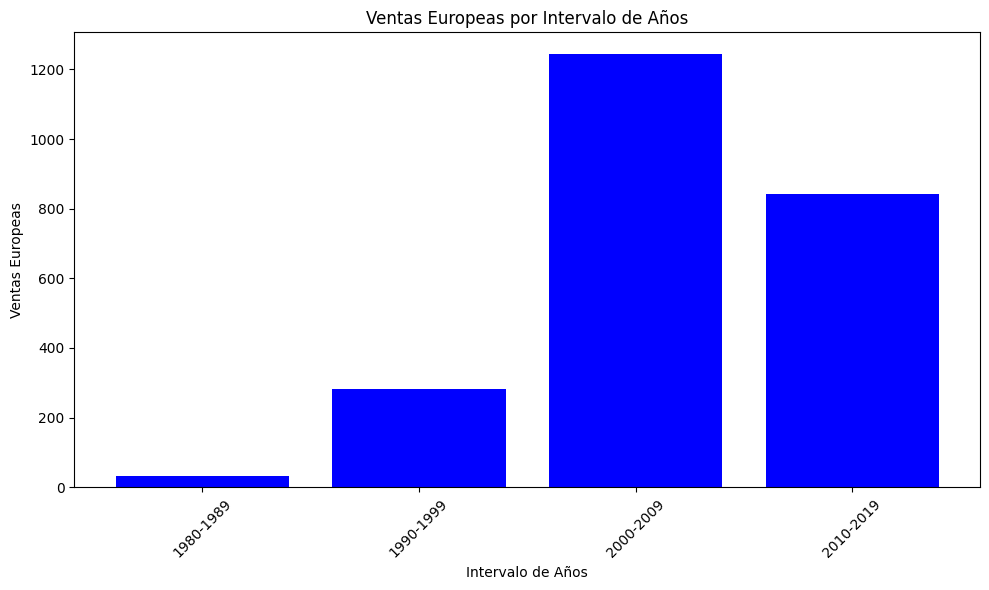

In [18]:
#@title Gráfico de ventas europeas por intervalo de años
# Graficar la tabla de frecuencia
plt.figure(figsize=(10, 6))
plt.bar(tabla_frecuencia['Intervalo de Años'], tabla_frecuencia['Ventas Europeas'], color='blue')
plt.xlabel('Intervalo de Años')
plt.ylabel('Ventas Europeas')
plt.title('Ventas Europeas por Intervalo de Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Se aprecia un sesgo en las ventas, siendo estas mayores en años posteriores a la década de los 2000

In [19]:
#@title Tabla de frecuencia de ventas en Japón por década
intervalos = range(1980, 2030, 10)  # Empieza en 1980, termina en 2025, intervalos de 5 años

# Crear etiquetas para los intervalos
etiquetas_intervalos = [f'{inicio}-{inicio+9}' for inicio in intervalos]

# Agrupar los datos por intervalo de años y calcular las frecuencias y sumas
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Años', 'Cantidad de ventas por intervalo', 'Ventas en Japon'])

for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Año_de_Lanzamiento'] >= inicio) & (df['Año_de_Lanzamiento'] <= fin)
    ventas_totales = df.loc[filtro, 'Ventas_JP'].sum()
    cantidad_anios = filtro.sum()
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_anios, ventas_totales]

# Mostrar la tabla de frecuencia
print(tabla_frecuencia.to_string(index=False))

#Nuevamente se observa que el auge de ventas y de ganancias sucedió en la década de los 2000-2009, casi doblando al éxito de la década siguiente
# y superando ampliamente las ventas de las dos décadas iniciales.

#Japón es un caso curioso, en tres décadas seguidas presenta ventas en yenes muy similares, aunque las cantidades de ventas son diferentes. En general, los datos de Japón son equilibrados
#en comparación al resto de localidades

Intervalo de Años  Cantidad de ventas por intervalo  Ventas en Japon
        1980-1989                               205           102.49
        1990-1999                              1771           372.36
        2000-2009                              9193           510.68
        2010-2019                              5280           305.20


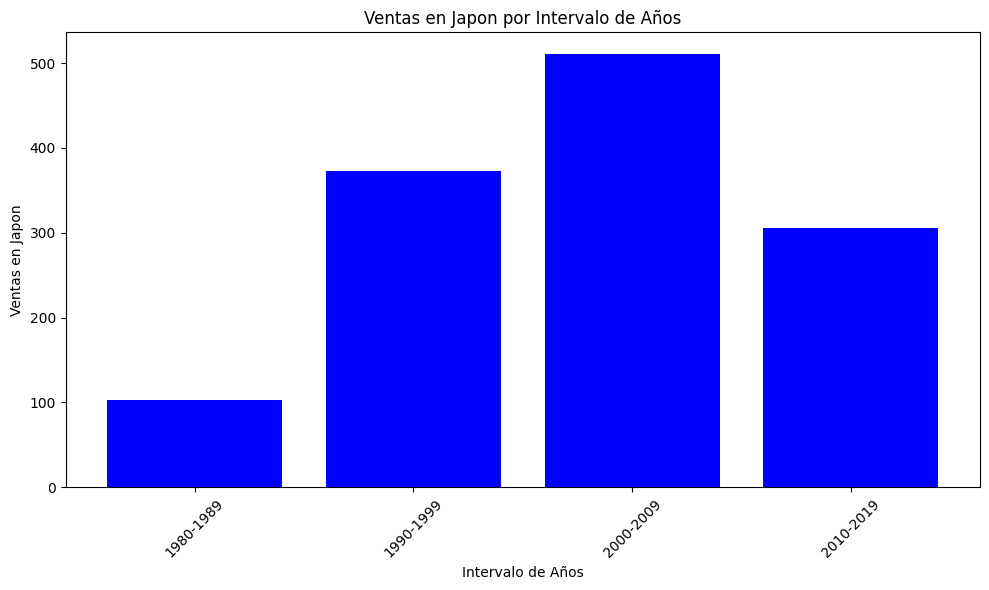

In [20]:
#@title Gráfico de ventas en Japón por intervalo de años
# Graficar la tabla de frecuencia
plt.figure(figsize=(10, 6))
plt.bar(tabla_frecuencia['Intervalo de Años'], tabla_frecuencia['Ventas en Japon'], color='blue')
plt.xlabel('Intervalo de Años')
plt.ylabel('Ventas en Japon')
plt.title('Ventas en Japon por Intervalo de Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Se aprecia, nuevamente, el equilibrio moderado de Japón

In [21]:
#@title Tabla de frecuencia de otras ventas por año
intervalos = range(1980, 2030, 10)  # Empieza en 1980, termina en 2025, intervalos de 5 años

# Crear etiquetas para los intervalos
etiquetas_intervalos = [f'{inicio}-{inicio+9}' for inicio in intervalos]

# Agrupar los datos por intervalo de años y calcular las frecuencias y sumas
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Años', 'Cantidad de ventas por intervalo', 'Otras ventas'])

for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Año_de_Lanzamiento'] >= inicio) & (df['Año_de_Lanzamiento'] <= fin)
    ventas_totales = df.loc[filtro, 'Otras_Ventas'].sum()
    cantidad_anios = filtro.sum()
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_anios, ventas_totales]

# Mostrar la tabla de frecuencia
print(tabla_frecuencia.to_string(index=False))

#En este caso, persiste la concentración de ventas en los años 2000-2009, pero las ganancias son mínimas en comparación a los otros países.
#El mercado norteamericano y europeo dominan por sobre el japonés en ganancias, y el mercado más internacional aún no está completamente abierto al mundo de los videojuegos.

Intervalo de Años  Cantidad de ventas por intervalo  Otras ventas
        1980-1989                               205          7.13
        1990-1999                              1771         47.47
        2000-2009                              9193        460.63
        2010-2019                              5280        267.48


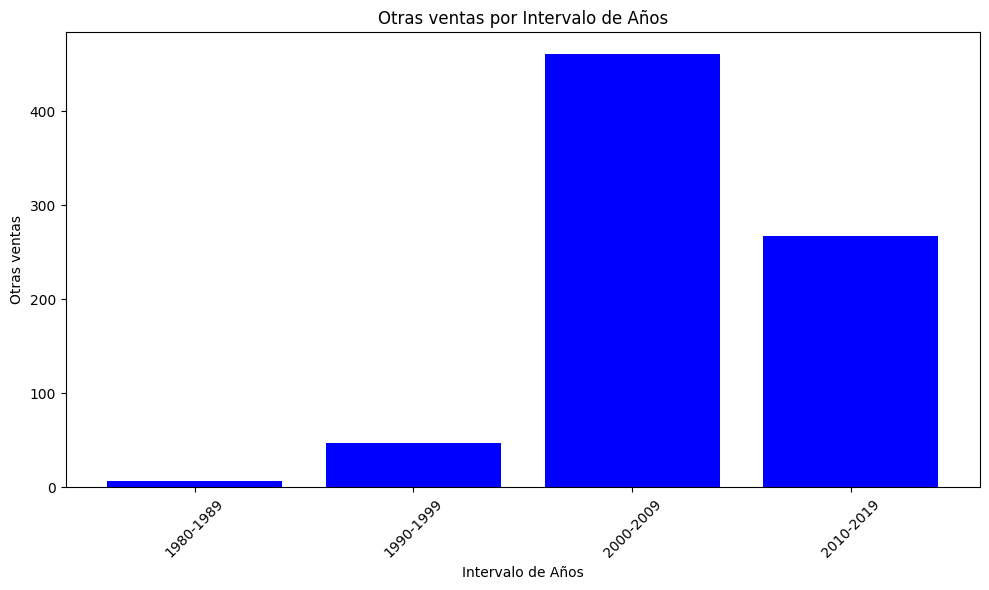

In [22]:
#@title Gráfico de Otras ventas por intervalo de años
# Graficar la tabla de frecuencia
plt.figure(figsize=(10, 6))
plt.bar(tabla_frecuencia['Intervalo de Años'], tabla_frecuencia['Otras ventas'], color='blue')
plt.xlabel('Intervalo de Años')
plt.ylabel('Otras ventas')
plt.title('Otras ventas por Intervalo de Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Se aprecia un sesgo en las ventas, siendo estas mayores en años posteriores a la década de los 2000

In [23]:
#@title Tabla de frecuencia de Juego por Género

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_genero = df.groupby('Género')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_genero['Porcentaje de Juegos'] = (juegos_por_genero['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_genero = juegos_por_genero.sort_values(by='Porcentaje de Juegos', ascending=False)

# Mostrar el DataFrame resultante
print(juegos_por_genero.to_string(index=False))

#Los géneros que más se repiten son Acción y Deportes, y los menos repetidos son los de Estrategia y Puzzle. Hay más variedad de juegos en el mercado que son de Acción y Deporte.

      Género  Título  Porcentaje de Juegos
      Action    3370             20.156708
      Sports    2348             14.043902
        Misc    1750             10.467133
Role-Playing    1500              8.971828
     Shooter    1323              7.913153
   Adventure    1303              7.793528
      Racing    1249              7.470542
    Platform     888              5.311322
  Simulation     874              5.227585
    Fighting     849              5.078055
    Strategy     683              4.085173
      Puzzle     580              3.469107


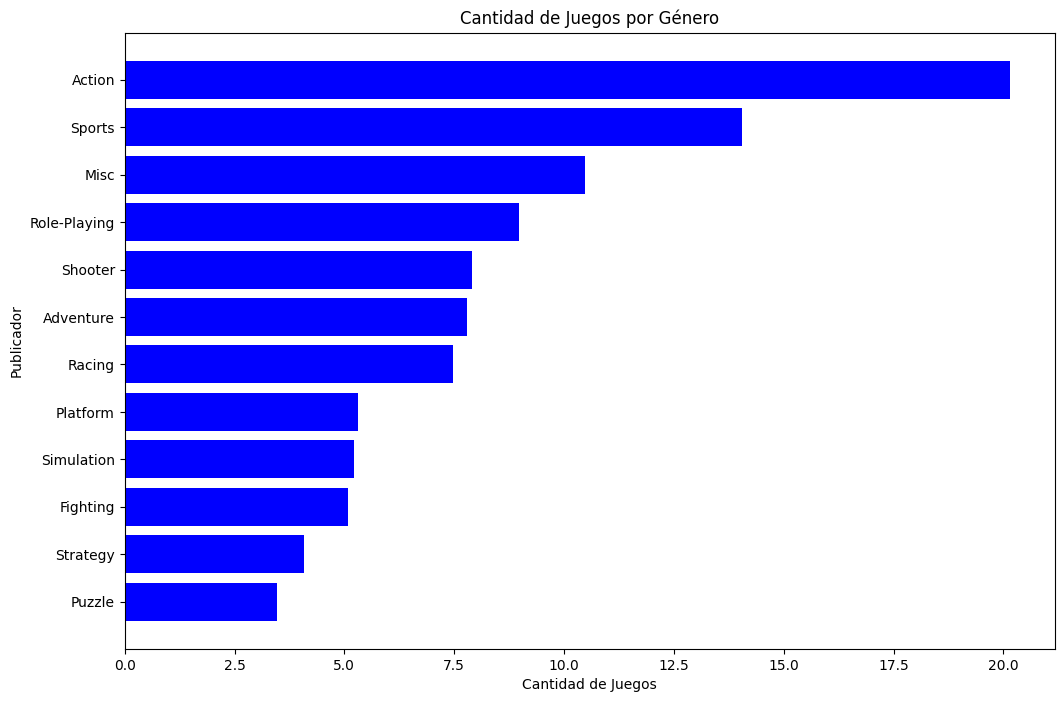

In [24]:
# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(juegos_por_genero['Género'], juegos_por_genero['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Publicador')
plt.title(f'Cantidad de Juegos por Género')
plt.gca().invert_yaxis()
plt.show()

#El 20% de títulos en el dataset corresponden al género Acción y apenas un 2.5% del dataset al género Puzzle.

In [25]:
#@title Tabla de frecuencia de Juego por Plataforma

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_plataforma = df.groupby('Plataforma')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_plataforma['Porcentaje de Juegos'] = (juegos_por_plataforma['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_plataforma = juegos_por_plataforma.sort_values(by='Porcentaje de Juegos', ascending=False)

print(juegos_por_plataforma.to_string(index=False))

#Hay una dispersión relevante en los datos, ya que la Plataforma dominante con más títulos apenas posee el 12% de los mismos.
#El mercado tiene mucha competencia entre plataformas y no hay una concentración extrema en ellas. Ni siquiera se podría decir que hay "tres grandes" plataformas que dominen el mercado.

Plataforma  Título  Porcentaje de Juegos
       PS2    2161             12.925414
        DS    2152             12.871583
       PS3    1331              7.961002
       Wii    1320              7.895209
      X360    1262              7.548298
       PSP    1209              7.231294
        PS    1197              7.159519
        PC     974              5.825707
        XB     824              4.928524
       GBA     822              4.916562
        GC     556              3.325558
       3DS     520              3.110234
       PSV     432              2.583887
       PS4     393              2.350619
       N64     319              1.908009
      XOne     247              1.477361
      SNES     239              1.429511
       SAT     173              1.034751
      WiiU     147              0.879239
      2600     133              0.795502
       NES      98              0.586159
        GB      98              0.586159
        DC      52              0.311023
       GEN      

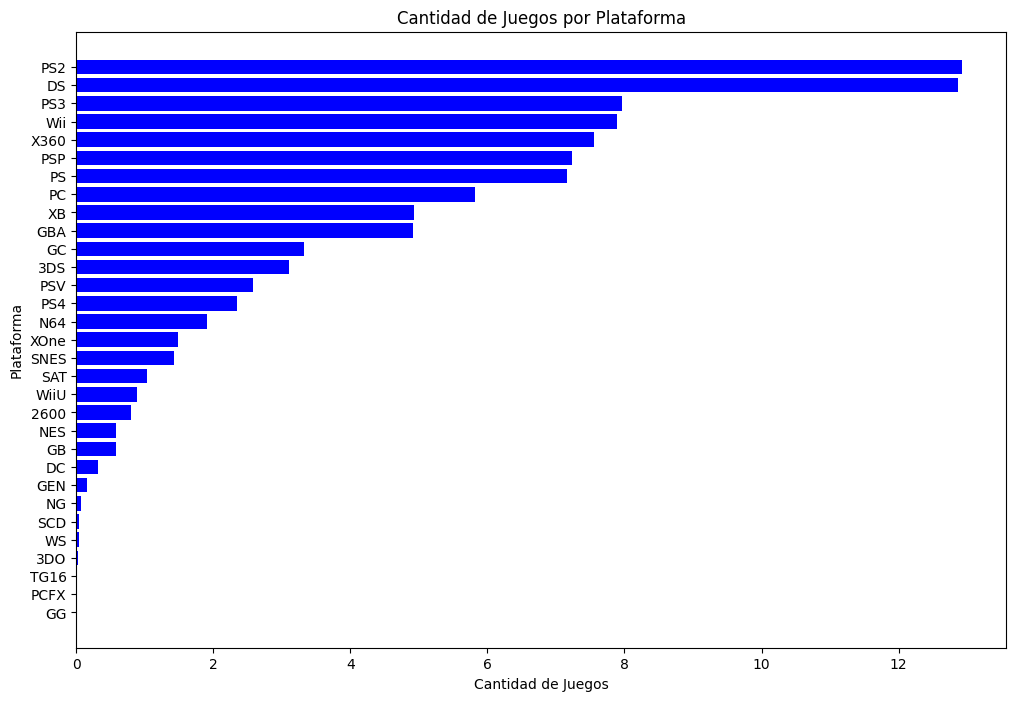

In [26]:
# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(juegos_por_plataforma['Plataforma'], juegos_por_plataforma['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Plataforma')
plt.title(f'Cantidad de Juegos por Plataforma')
plt.gca().invert_yaxis()
plt.show()

#Se nota la predominancia moderada de dos plataformas, y la dispersión de los datos en el resto de ellas.

In [27]:
#@title Cantidad de Juegos por ventas en Norte América

total_juegos = len(df)

# Definir los límites de los intervalos de NA_Sales
intervalos = range(0, int(df['Ventas_NA'].max()) + 6, 5)  # Intervalos de 5 en 5

# Inicializar el DataFrame de tabla de frecuencia
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Ventas_NA', 'Cantidad de Juegos', 'Porcentaje de Juegos'])

# Iterar sobre los intervalos y calcular las frecuencias y sumas
for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Ventas_NA'] >= inicio) & (df['Ventas_NA'] <= fin)
    cantidad_juegos = filtro.sum()
    porcentaje_juegos = (cantidad_juegos / total_juegos) * 100
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_juegos, porcentaje_juegos]

# Mostrar el DataFrame resultante
print(tabla_frecuencia.to_string(index=False))

#Se aprecia que el intervalo de 0.0 y 4.0 millones de ventas hay una concentración masiva de títulos de juegos, solo un título supera los 40 millones de ventas, indicando nuevamente
#la volatilidad del mercado de videojuegos y cómo hay títulos excepcionalmente exitosos

Intervalo de Ventas_NA  Cantidad de Juegos  Porcentaje de Juegos
                   0-4               16631             99.473653
                   5-9                  38              0.227286
                 10-14                   5              0.029906
                 15-19                   3              0.017944
                 20-24                   1              0.005981
                 25-29                   1              0.005981
                 30-34                   0              0.000000
                 35-39                   0              0.000000
                 40-44                   1              0.005981


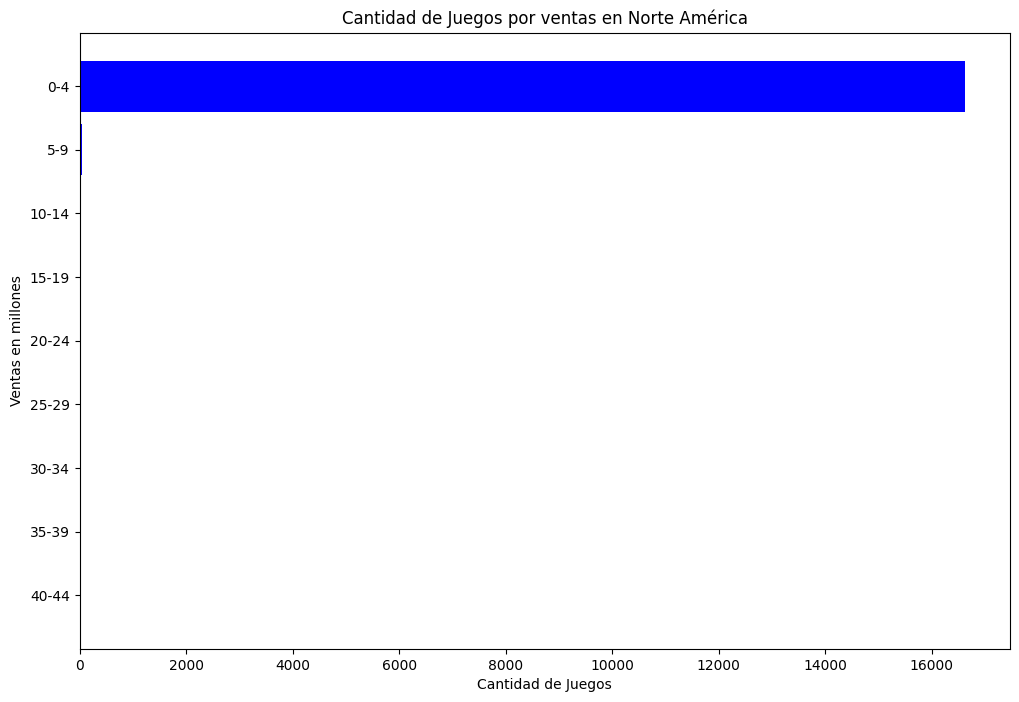

In [28]:
# Graficar los top N de Ventas por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(tabla_frecuencia['Intervalo de Ventas_NA'], tabla_frecuencia['Cantidad de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Ventas en millones')
plt.title(f'Cantidad de Juegos por ventas en Norte América')
plt.gca().invert_yaxis()
plt.show()

In [29]:
#@title Cantidad de Juegos por ventas Europeas
total_juegos = len(df)

# Definir los límites de los intervalos de NA_Sales
intervalos = range(0, int(df['Ventas_EU'].max()) + 6, 5)  # Intervalos de 5 en 5

# Inicializar el DataFrame de tabla de frecuencia
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Ventas_EU', 'Cantidad de Juegos', 'Porcentaje de Juegos'])

# Iterar sobre los intervalos y calcular las frecuencias y sumas
for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Ventas_EU'] >= inicio) & (df['Ventas_EU'] <= fin)
    cantidad_juegos = filtro.sum()
    porcentaje_juegos = (cantidad_juegos / total_juegos) * 100
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_juegos, porcentaje_juegos]

# Mostrar el DataFrame resultante
print(tabla_frecuencia.to_string(index=False))

#El intervalo de ventas en Europa es menor, no superando los 30 millones. De nueva cuenta, hay una concentración en el primer intervalo.

Intervalo de Ventas_EU  Cantidad de Juegos  Porcentaje de Juegos
                   0-4               16679             99.760751
                   5-9                  20              0.119624
                 10-14                   3              0.017944
                 15-19                   0              0.000000
                 20-24                   0              0.000000
                 25-29                   1              0.005981


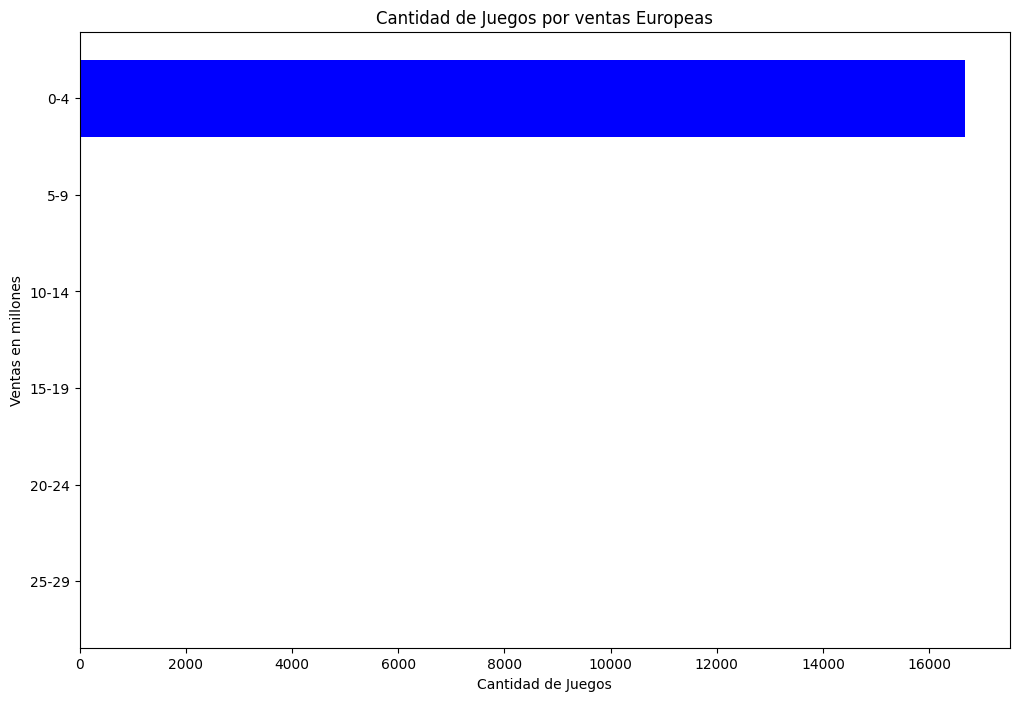

In [30]:
# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(tabla_frecuencia['Intervalo de Ventas_EU'], tabla_frecuencia['Cantidad de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Ventas en millones')
plt.title(f'Cantidad de Juegos por ventas Europeas')
plt.gca().invert_yaxis()
plt.show()

In [32]:
#@title Cantidad de Juegos por ventas en Japón
total_juegos = len(df)

# Definir los límites de los intervalos de NA_Sales
intervalos = range(0, int(df['Ventas_JP'].max()) + 6, 5)  # Intervalos de 5 en 5

# Inicializar el DataFrame de tabla de frecuencia
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Ventas_JP', 'Cantidad de Juegos', 'Porcentaje de Juegos'])

# Iterar sobre los intervalos y calcular las frecuencias y sumas
for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Ventas_JP'] >= inicio) & (df['Ventas_JP'] <= fin)
    cantidad_juegos = filtro.sum()
    porcentaje_juegos = (cantidad_juegos / total_juegos) * 100
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_juegos, porcentaje_juegos]

# Mostrar el DataFrame resultante
print(tabla_frecuencia.to_string(index=False))

#Disminuye aún más la ganancia en ventas en Japón y nuevamente hay una concentración de las mismas en el primer intervalo.

Intervalo de Ventas_JP  Cantidad de Juegos  Porcentaje de Juegos
                   0-4               16699             99.880376
                   5-9                   8              0.047850
                 10-14                   1              0.005981


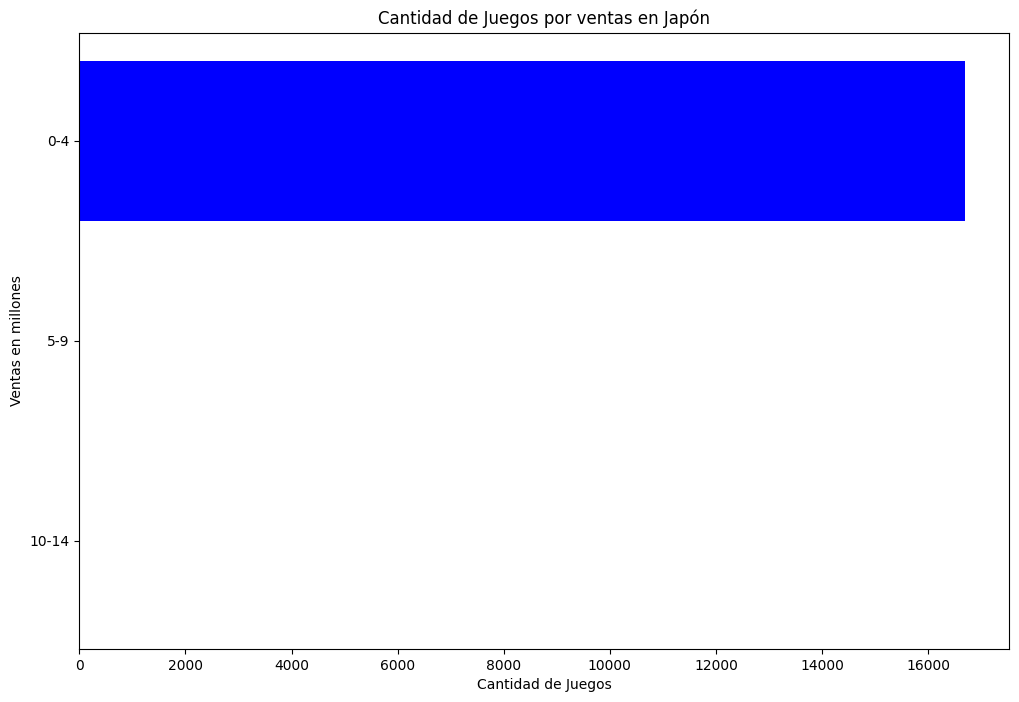

In [33]:
# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(tabla_frecuencia['Intervalo de Ventas_JP'], tabla_frecuencia['Cantidad de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Ventas en millones')
plt.title(f'Cantidad de Juegos por ventas en Japón')
plt.gca().invert_yaxis()
plt.show()

In [71]:
#@title Cantidad de Juegos por Otras ventas
total_juegos = len(df)

# Definir los límites de los intervalos de NA_Sales
intervalos = range(0, int(df['Otras_Ventas'].max()) + 6, 5)  # Intervalos de 5 en 5

# Inicializar el DataFrame de tabla de frecuencia
tabla_frecuencia = pd.DataFrame(columns=['Intervalo de Otras_Ventas', 'Cantidad de Juegos', 'Porcentaje de Juegos'])

# Iterar sobre los intervalos y calcular las frecuencias y sumas
for i in range(len(intervalos) - 1):
    inicio = intervalos[i]
    fin = intervalos[i + 1] - 1
    filtro = (df['Otras_Ventas'] >= inicio) & (df['Otras_Ventas'] <= fin)
    cantidad_juegos = filtro.sum()
    porcentaje_juegos = (cantidad_juegos / total_juegos) * 100
    tabla_frecuencia.loc[i] = [f'{inicio}-{fin}', cantidad_juegos, porcentaje_juegos]

# Mostrar el DataFrame resultante
print(tabla_frecuencia.to_string(index=False))

#Las ganancias en millones otra vez disminuyeron, esta vez en el mercado internacional. Y nuevamente hay una concentración de ganancias en el primer intervalo.

Intervalo de Otras_Ventas  Cantidad de Juegos  Porcentaje de Juegos
                      0-4               16716             99.982056
                      5-9                   2              0.011962
                    10-14                   1              0.005981


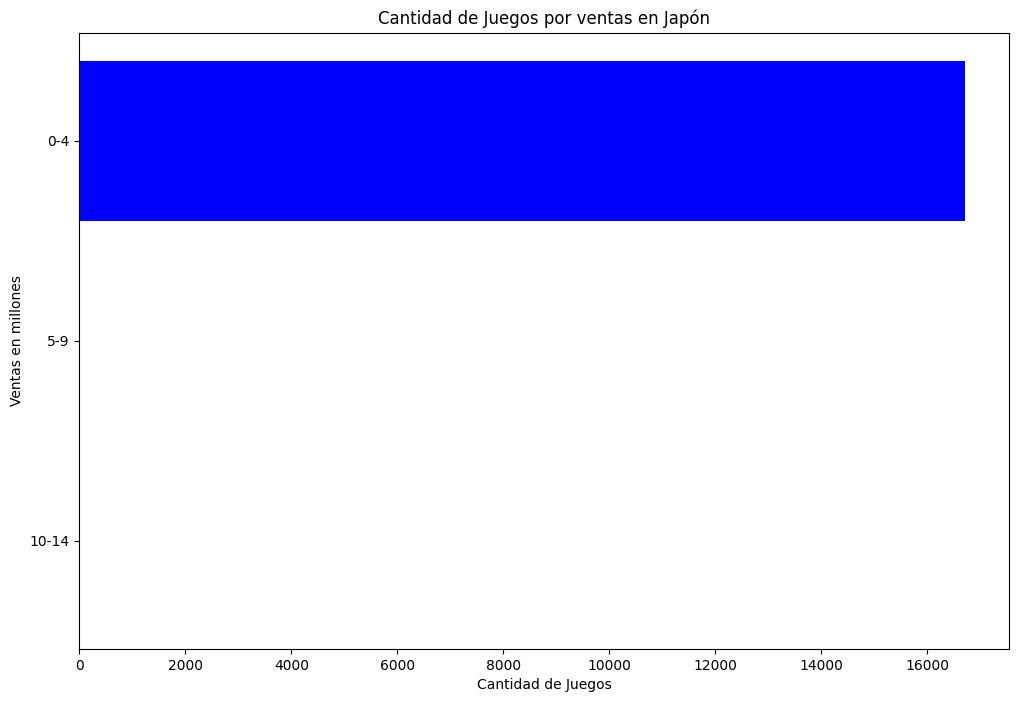

In [35]:
# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(tabla_frecuencia['Intervalo de Otras_Ventas'], tabla_frecuencia['Cantidad de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Ventas en millones')
plt.title(f'Cantidad de Juegos por ventas en Japón')
plt.gca().invert_yaxis()
plt.show()

In [36]:
#@title Tabla de frecuencia de Juego por Desarrollador

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_desarrollador = df.groupby('Desarrollador')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_desarrollador['Porcentaje de Juegos'] = (juegos_por_desarrollador['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_desarrollador = juegos_por_desarrollador.sort_values(by='Porcentaje de Juegos', ascending=False)

print(juegos_por_desarrollador.to_string(index=False))

#Hay una dispersión increíble en los datos, el desarrollador con más cantidad de juegos a su nombre apenas supera los 200 títulos, que conforman un 1% del total de títulos.
#Esto de nuevo plantea que hay una gran diversidad de empresas y equipos en el mundo de videojuegos.

                                                                   Desarrollador  Título  Porcentaje de Juegos
                                                                         Ubisoft     204              1.220169
                                                                       EA Sports     172              1.028770
                                                                       EA Canada     167              0.998864
                                                                          Konami     162              0.968957
                                                                          Capcom     139              0.831389
                                                                      EA Tiburon     108              0.645972
                                                                 Electronic Arts     104              0.622047
                                                                Ubisoft Montreal     101              0.604103
 

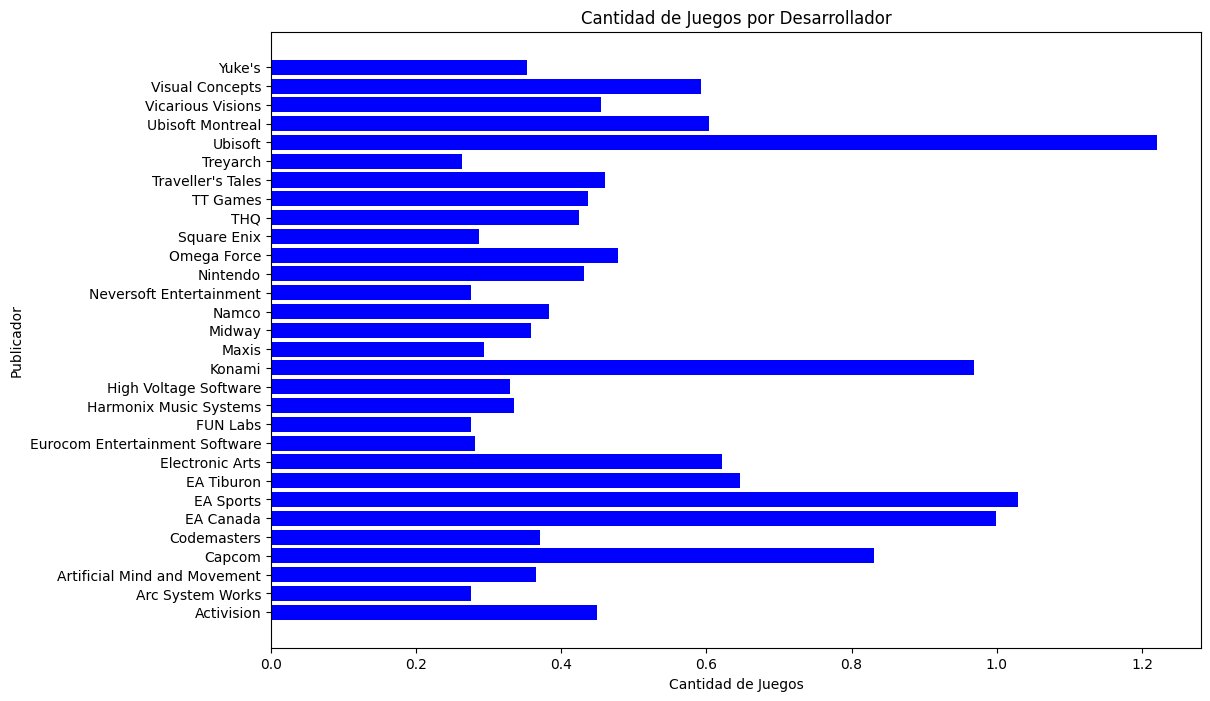

In [ ]:
# Preparar datos para visualización (opcionalmente limitar a los primeros N publicadores)
N = 30  # Por ejemplo, los primeros 30 publicadores
top_publicadores = juegos_por_desarrollador.head(N).sort_values(by="Desarrollador",ascending=False)

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(top_publicadores['Desarrollador'], top_publicadores['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Publicador')
plt.title(f'Cantidad de Juegos por Desarrollador')
plt.gca().invert_yaxis()
plt.show()

#Otra vez, se parecia la predominancia de Ubisoft por sobre los demás Desarrolladores

In [37]:
#@title Tabla de frecuencia de Juego por Publicador

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_publicador = df.groupby('Editor')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_publicador['Porcentaje de Juegos'] = (juegos_por_publicador['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_publicador = juegos_por_publicador.sort_values(by='Porcentaje de Juegos', ascending=False)

print(juegos_por_publicador.to_string(index=False))

#Otra vez, hay una dispersión enorme en los datos. Esta vez el publicador más predominante ni siquiera supera el 10% de los juegos totales.

                                Editor  Título  Porcentaje de Juegos
                       Electronic Arts    1356              8.110533
                            Activision     985              5.891501
                    Namco Bandai Games     939              5.616365
                               Ubisoft     933              5.580477
          Konami Digital Entertainment     834              4.988337
                                   THQ     715              4.276572
                              Nintendo     706              4.222741
           Sony Computer Entertainment     687              4.109097
                                  Sega     638              3.816018
                  Take-Two Interactive     422              2.524074
                                Capcom     386              2.308751
                                 Atari     367              2.195107
                            Tecmo Koei     348              2.081464
Warner Bros. Interactive Entertain

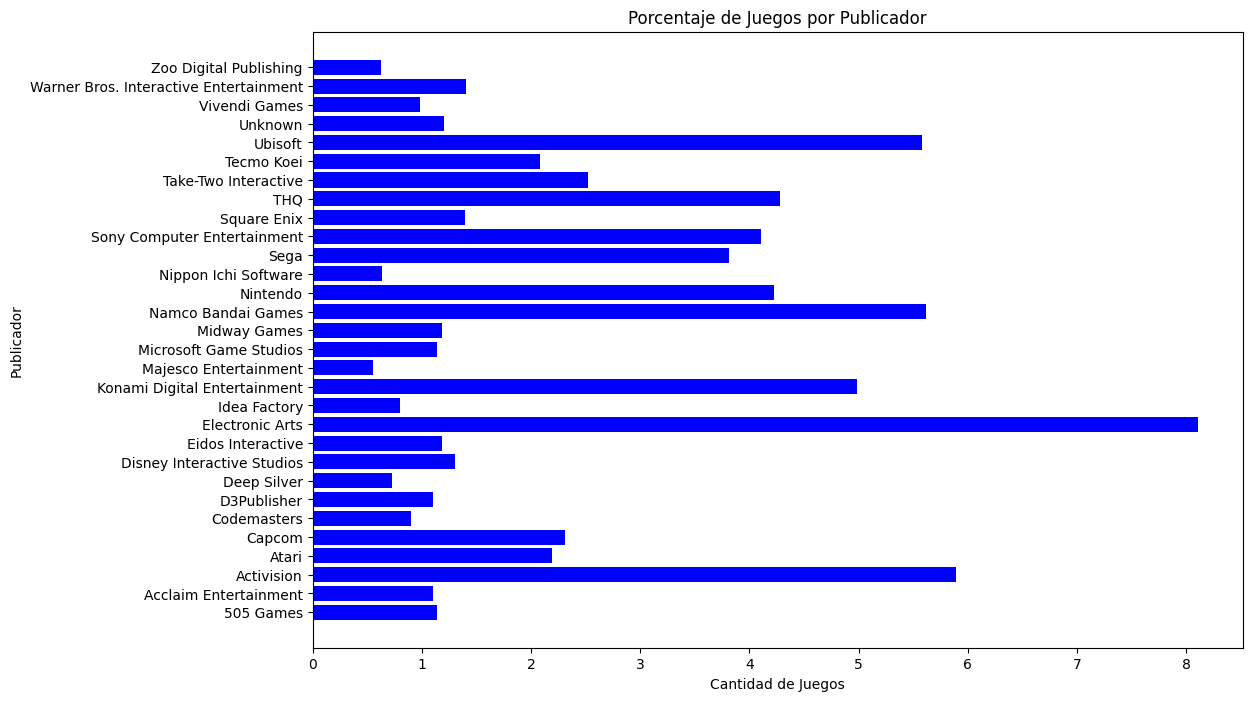

In [38]:
# Preparar datos para visualización (opcionalmente limitar a los primeros N publicadores)
N = 30  # Por ejemplo, los primeros 30 publicadores
top_publicadores = juegos_por_publicador.head(N).sort_values(by="Editor",ascending=False)

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(top_publicadores['Editor'], top_publicadores['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Publicador')
plt.title(f'Porcentaje de Juegos por Publicador')
plt.gca().invert_yaxis()
plt.show()

#Electronic Arts va a la cabeza, seguido de Activision y Ubisoft. Dentro del top 30 de Publicadores, Zoo Digital Publishing es el que menos títulos tiene a su nombre.

In [39]:
#@title Tabla de frecuencia de Juego por Puntuación
import pandas as pd

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_puntuacion = df.groupby('Puntuación_Usuarios')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_puntuacion['Porcentaje de Juegos'] = (juegos_por_puntuacion['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_puntuacion = juegos_por_puntuacion.sort_values(by='Porcentaje de Juegos', ascending=False)

# Mostrar el DataFrame resultante
print(juegos_por_puntuacion.to_string(index=False))

#Nuevamente, la dispersión de los datos no ayuda a tener claridad sobre los mismos. Donde más se concentran es en una categoría indefinida.
#El resto de puntuaciones fluctúan entre un cero y un dos por ciento de los títulos

Puntuación_Usuarios  Título  Porcentaje de Juegos
                tbd    2425             14.504456
                7.8     324              1.937915
                  8     290              1.734554
                8.2     282              1.686704
                8.3     254              1.519230
                8.5     253              1.513248
                7.5     251              1.501286
                7.9     249              1.489324
                8.1     244              1.459417
                7.7     240              1.435493
                7.3     236              1.411568
                8.4     223              1.333812
                  7     220              1.315868
                7.6     220              1.315868
                7.4     215              1.285962
                8.6     211              1.262037
                6.8     197              1.178300
                8.7     188              1.124469
                8.8     186              1.112507


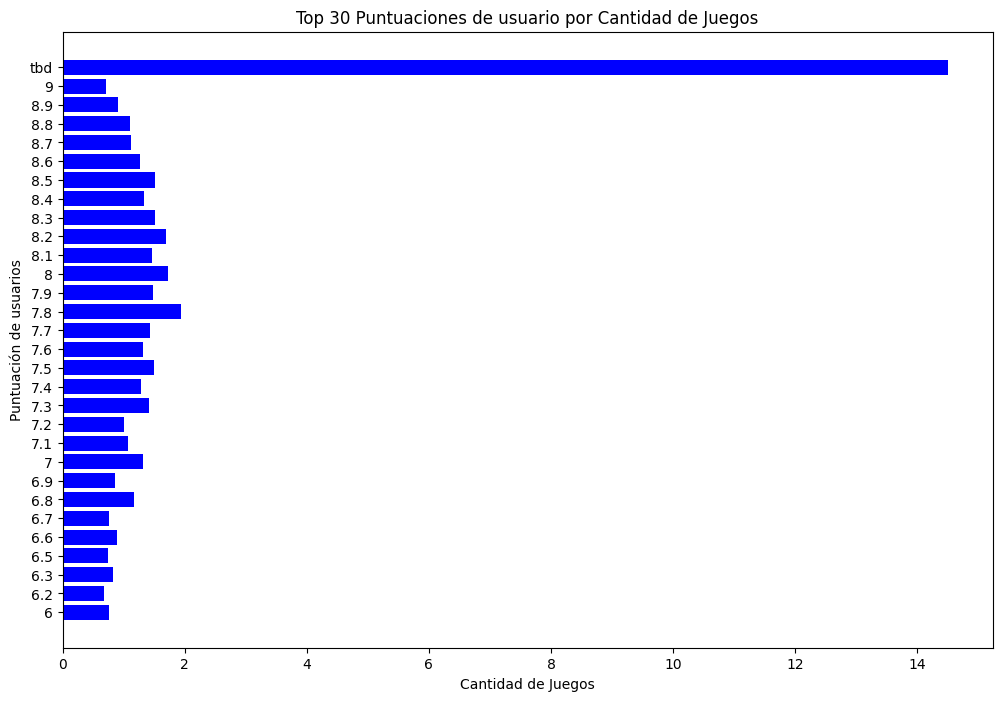

In [40]:
#@title Graficamos las puntuaciones y la cantidad de juegos por puntuacion de usuario
import matplotlib.pyplot as plt

# Preparar datos para visualización (opcionalmente limitar a los primeros N publicadores)
N = 30  # Por ejemplo, los primeros 30 publicadores
top_publicadores = juegos_por_puntuacion.head(N).sort_values(by="Puntuación_Usuarios",ascending=False)

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(top_publicadores['Puntuación_Usuarios'], top_publicadores['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Puntuación de usuarios')
plt.title(f'Top {N} Puntuaciones de usuario por Cantidad de Juegos')
plt.gca().invert_yaxis()
plt.show()

#Con excepción de la primera categoría, el resto de puntuaciones dentro del top treinta parecen tener un equilibrio.

In [41]:
#@title Tabla de frecuencia de Juego por Número de Usuarios
import pandas as pd

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_puntuacion = df.groupby('Número_de_Usuarios')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_puntuacion['Porcentaje de Juegos'] = (juegos_por_puntuacion['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_puntuacion = juegos_por_puntuacion.sort_values(by='Porcentaje de Juegos', ascending=False)

# Mostrar el DataFrame resultante
print(juegos_por_puntuacion.to_string(index=False))

#La cantidad predominante de usuarios por título es de 4 y 6.

 Número_de_Usuarios  Título  Porcentaje de Juegos
                4.0     344              2.057539
                6.0     341              2.039596
                5.0     335              2.003708
                8.0     283              1.692685
                7.0     269              1.608948
                9.0     239              1.429511
               10.0     192              1.148394
               11.0     179              1.070638
               12.0     166              0.992882
               13.0     160              0.956995
               14.0     150              0.897183
               15.0     143              0.855314
               16.0     139              0.831389
               17.0     133              0.795502
               19.0     124              0.741671
               18.0     120              0.717746
               21.0     115              0.687840
               20.0     112              0.669897
               22.0      99              0.592141


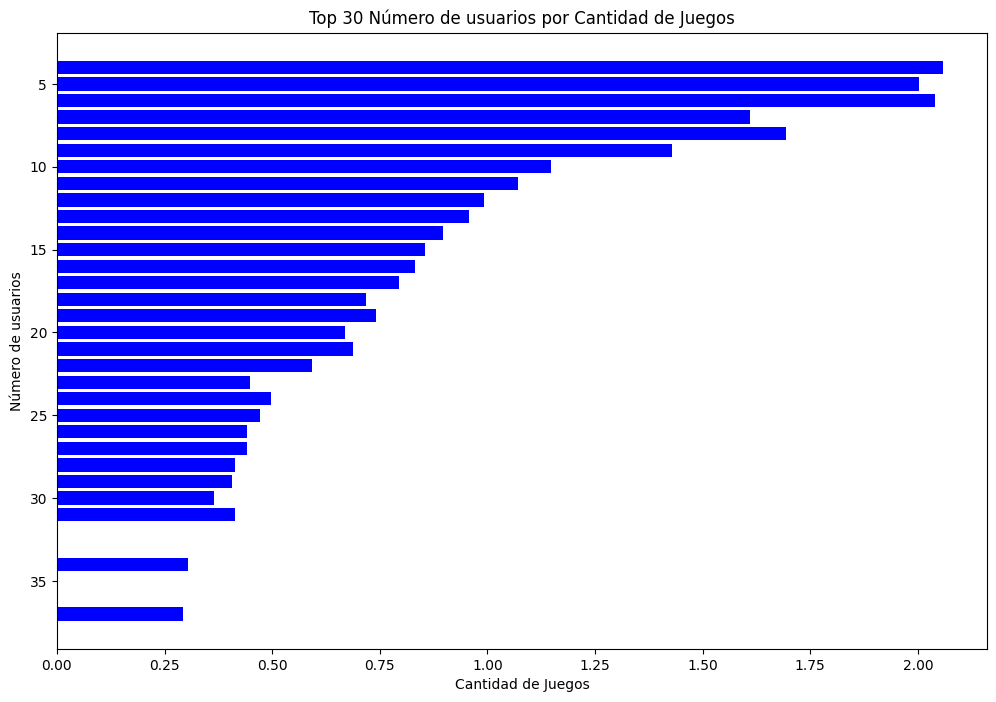

In [42]:
#@title Graficamos las puntuaciones y la cantidad de juegos por Número de Usuarios
import matplotlib.pyplot as plt

# Preparar datos para visualización (opcionalmente limitar a los primeros N publicadores)
N = 30  # Por ejemplo, los primeros 30 publicadores
top_publicadores = juegos_por_puntuacion.head(N).sort_values(by="Número_de_Usuarios",ascending=False)

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(top_publicadores['Número_de_Usuarios'], top_publicadores['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Número de usuarios')
plt.title(f'Top {N} Número de usuarios por Cantidad de Juegos')
plt.gca().invert_yaxis()
plt.show()

In [43]:
#@title Tabla de frecuencia de Juego por Puntuación crítica
import pandas as pd

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_puntuacion = df.groupby('Puntuación_Crítica')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_puntuacion['Porcentaje de Juegos'] = (juegos_por_puntuacion['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_puntuacion = juegos_por_puntuacion.sort_values(by='Porcentaje de Juegos', ascending=False)

# Mostrar el DataFrame resultante
print(juegos_por_puntuacion.to_string(index=False))

#Como va siendo costumbre, las puntuaciones de los títulos tiene una gran dispersión. Aún así, la puntuación predominante es de 70 puntos, apenas por un par de décimas.

 Puntuación_Crítica  Título  Porcentaje de Juegos
               70.0     256              1.531192
               71.0     254              1.519230
               75.0     245              1.465399
               78.0     240              1.435493
               73.0     238              1.423530
               80.0     237              1.417549
               76.0     235              1.405586
               72.0     226              1.351755
               74.0     226              1.351755
               77.0     225              1.345774
               68.0     219              1.309887
               81.0     218              1.303906
               79.0     218              1.303906
               69.0     215              1.285962
               82.0     208              1.244094
               83.0     206              1.232131
               66.0     203              1.214187
               65.0     192              1.148394
               84.0     183              1.094563


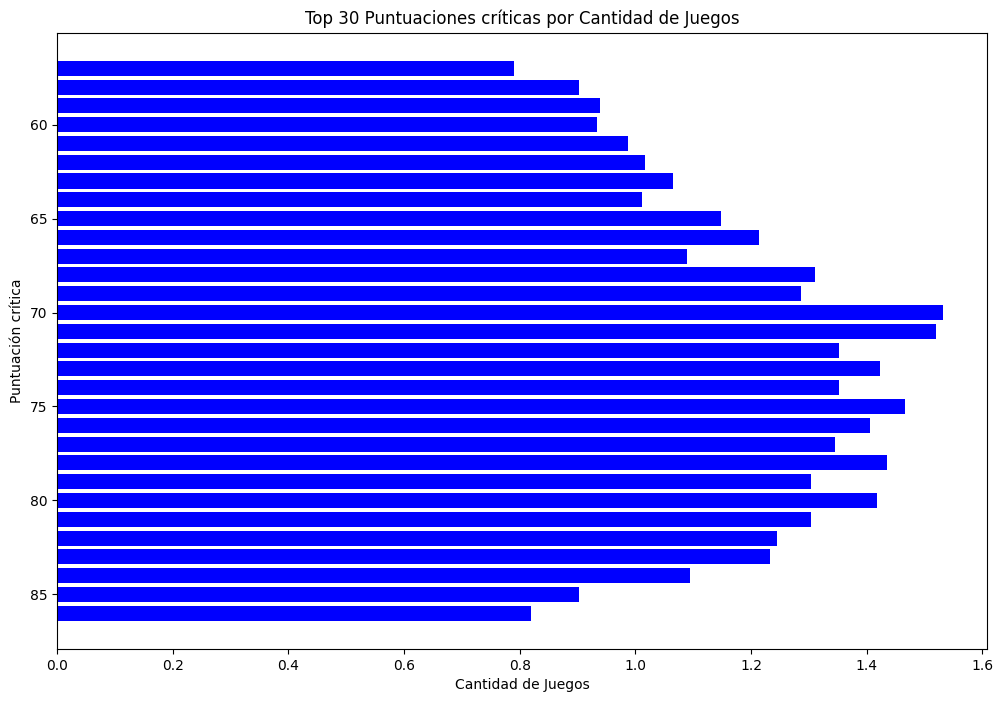

In [44]:
#@title Graficamos las puntuaciones y la cantidad de juegos por puntuacion crítica
import matplotlib.pyplot as plt

# Preparar datos para visualización (opcionalmente limitar a los primeros N publicadores)
N = 30  # Por ejemplo, los primeros 30 publicadores
top_publicadores = juegos_por_puntuacion.head(N).sort_values(by="Puntuación_Crítica",ascending=False)

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(top_publicadores['Puntuación_Crítica'], top_publicadores['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Puntuación crítica')
plt.title(f'Top {N} Puntuaciones críticas por Cantidad de Juegos')
plt.gca().invert_yaxis()
plt.show()

In [45]:
#@title Tabla de frecuencia de Juego por Número de Críticos
import pandas as pd

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_puntuacion = df.groupby('Número_de_Críticos')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_puntuacion['Porcentaje de Juegos'] = (juegos_por_puntuacion['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_puntuacion = juegos_por_puntuacion.sort_values(by='Porcentaje de Juegos', ascending=False)

# Mostrar el DataFrame resultante
print(juegos_por_puntuacion.to_string(index=False))

#Nuevamente, hay una gran dispersión. La cantidad de críticos (4) es predominante por sobre el resto por cuestión de unas pocas décimas.

 Número_de_Críticos  Título  Porcentaje de Juegos
                4.0     307              1.836234
                5.0     273              1.632873
                9.0     248              1.483342
               11.0     248              1.483342
                7.0     243              1.453436
                8.0     240              1.435493
                6.0     235              1.405586
               17.0     235              1.405586
               12.0     229              1.369699
               16.0     218              1.303906
               13.0     218              1.303906
               10.0     217              1.297925
               14.0     212              1.268018
               15.0     208              1.244094
               18.0     196              1.172319
               22.0     189              1.130450
               19.0     186              1.112507
               21.0     185              1.106526
               20.0     174              1.040732


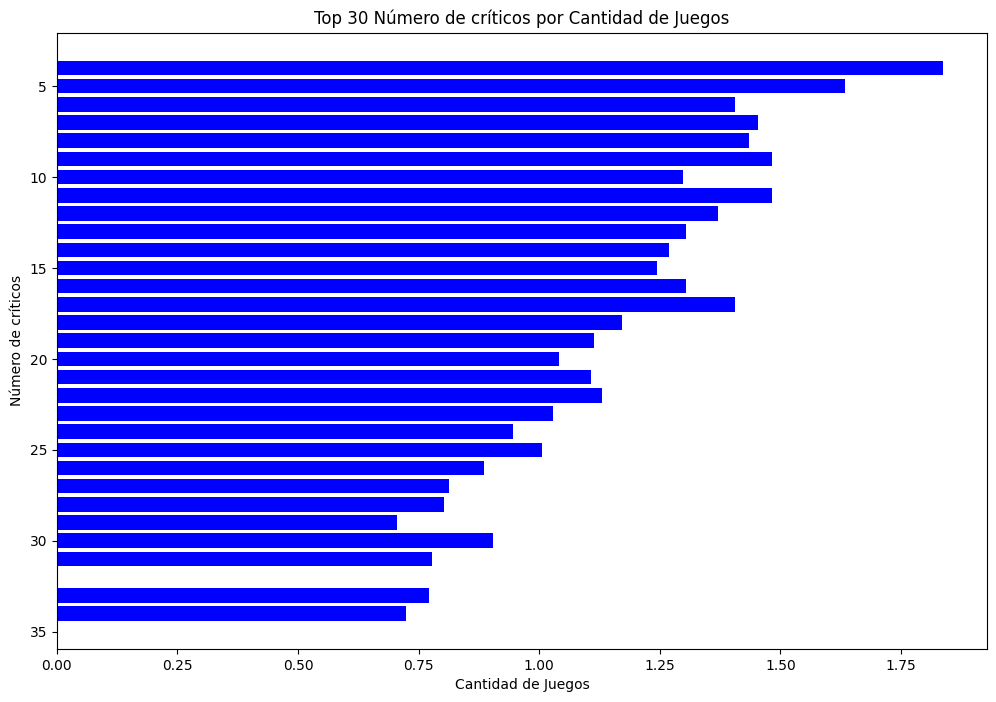

In [46]:
#@title Graficamos las puntuaciones y la cantidad de juegos por Número de Críticos
import matplotlib.pyplot as plt

# Preparar datos para visualización (opcionalmente limitar a los primeros N publicadores)
N = 30  # Por ejemplo, los primeros 30 publicadores
top_publicadores = juegos_por_puntuacion.head(N).sort_values(by="Número_de_Críticos",ascending=False)

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(top_publicadores['Número_de_Críticos'], top_publicadores['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Número de críticos')
plt.title(f'Top {N} Número de críticos por Cantidad de Juegos')
plt.gca().invert_yaxis()
plt.show()

In [47]:
#@title Tabla de frecuencia de Juego por Rating
import pandas as pd

# Calcular la cantidad total de juegos en el dataset
total_juegos = len(df)

# Calcular la cantidad de juegos por publicador
juegos_por_rating = df.groupby('Clasificación')['Título'].count().reset_index()

# Calcular el porcentaje de juegos por publicador
juegos_por_rating['Porcentaje de Juegos'] = (juegos_por_rating['Título'] / total_juegos) * 100

# Ordenar de mayor a menor porcentaje de juegos
juegos_por_rating = juegos_por_rating.sort_values(by='Porcentaje de Juegos', ascending=False)

# Mostrar el DataFrame resultante
print(juegos_por_rating.to_string(index=False))

#La mayoría de juegos tiene una clasificación E, proveniente de "Everyone" que indica que el título es apto para todos los publicos

Clasificación  Título  Porcentaje de Juegos
            E    3991             23.871045
            T    2961             17.710389
            M    1563              9.348645
         E10+    1420              8.493331
           EC       8              0.047850
          K-A       3              0.017944
           RP       3              0.017944
           AO       1              0.005981


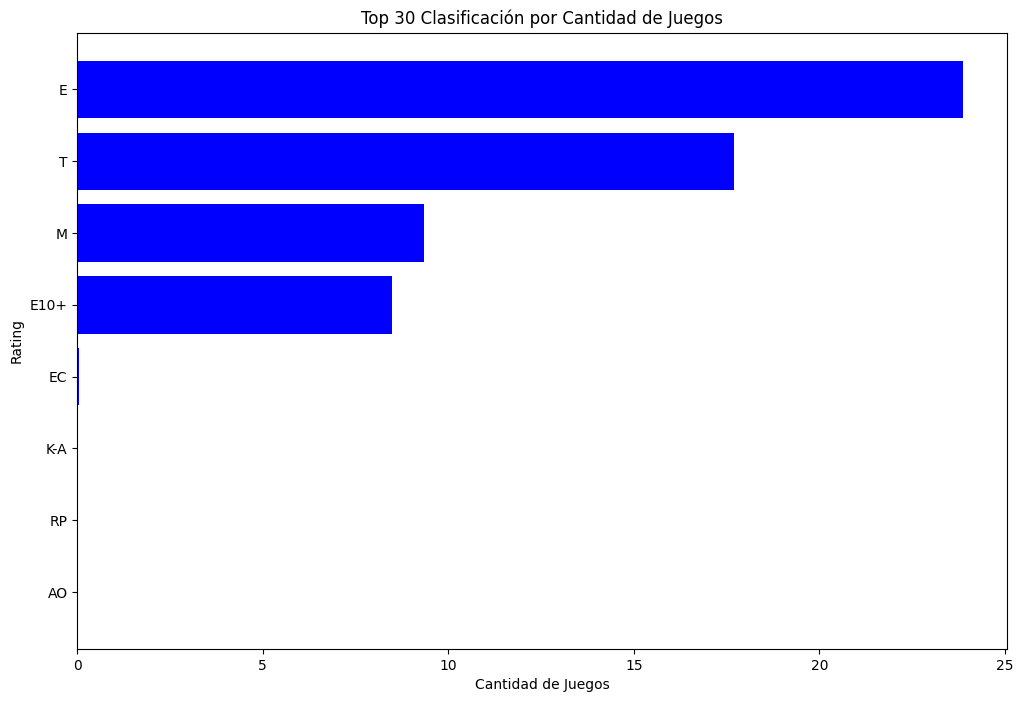

In [48]:
#@title Graficamos los rating y la cantidad de juegos que han publicado

# Graficar los top N publicadores por cantidad de juegos
plt.figure(figsize=(12, 8))
plt.barh(juegos_por_rating['Clasificación'], juegos_por_rating['Porcentaje de Juegos'], color="blue")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Rating')
plt.title(f'Top {N} Clasificación por Cantidad de Juegos')
plt.gca().invert_yaxis()
plt.show()

**Correlacion**

In [58]:
corr = df.corr(numeric_only=True)
print(corr)

                     Año_de_Lanzamiento  Ventas_NA  Ventas_EU  Ventas_JP  \
Año_de_Lanzamiento             1.000000  -0.092562   0.003842  -0.168386   
Ventas_NA                     -0.092562   1.000000   0.765336   0.449598   
Ventas_EU                      0.003842   0.765336   1.000000   0.435068   
Ventas_JP                     -0.168386   0.449598   0.435068   1.000000   
Otras_Ventas                   0.037700   0.638654   0.722796   0.291096   
Ventas_Globales               -0.076433   0.941010   0.901239   0.612300   
Puntuación_Crítica            -0.006347   0.172929   0.180717   0.098274   
Número_de_Críticos             0.132075   0.243872   0.263949   0.091652   
Puntuación_Usuarios           -0.163336   0.042100   0.021660   0.083752   
Número_de_Usuarios             0.118237   0.208496   0.271543   0.034694   

                     Otras_Ventas  Ventas_Globales  Puntuación_Crítica  \
Año_de_Lanzamiento       0.037700        -0.076433           -0.006347   
Ventas_NA      

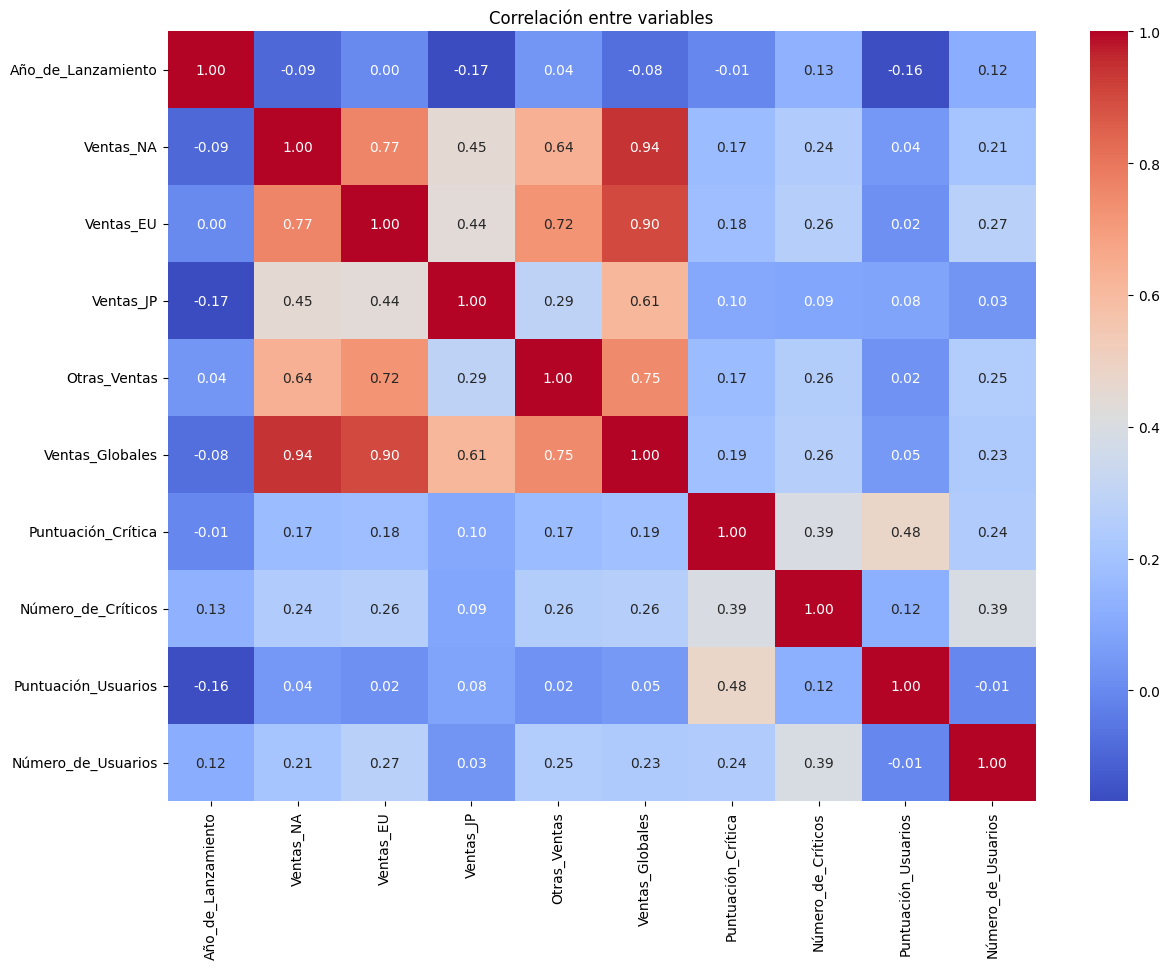

In [59]:
# Visualizar la correlación entre las variables
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlación entre variables')
plt.show()

**Correlaciones Positivas Significativas**
- Ventas_NA y Ventas_Globales (0.941): indica que el mercado norteamericano es un gran impulsor de las ventas totales.
- Ventas_EU y Ventas_Globales (0.901): indicando que este mercado es crucial para las ventas totales.

- Ventas_EU y Ventas_NA (0.765): indicao que los juegos que son populares en una de estas regiones tienden a ser populares en la otra.


**Correlaciones Negativas Significativa**
- Año_de_Lanzamiento y Ventas_JP (-0.168): indica  que los juegos más antiguos tienen ventas relativamente mayores en Japón en comparación con los lanzamientos más recientes.
- Año_de_Lanzamiento y Puntuación_Usuarios (-0.163): indica que los juegos más nuevos tienden a recibir puntuaciones ligeramente más bajas de los usuarios.

#FASE 3 : Preparar los datos

Se crea un dataset df1, con las columnas relevantes

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Título               16717 non-null  object 
 1   Plataforma           16719 non-null  object 
 2   Año_de_Lanzamiento   16450 non-null  float64
 3   Género               16717 non-null  object 
 4   Editor               16665 non-null  object 
 5   Ventas_NA            16719 non-null  float64
 6   Ventas_EU            16719 non-null  float64
 7   Ventas_JP            16719 non-null  float64
 8   Otras_Ventas         16719 non-null  float64
 9   Ventas_Globales      16719 non-null  float64
 10  Puntuación_Crítica   8137 non-null   float64
 11  Número_de_Críticos   8137 non-null   float64
 12  Puntuación_Usuarios  10015 non-null  object 
 13  Número_de_Usuarios   7590 non-null   float64
 14  Desarrollador        10096 non-null  object 
 15  Clasificación        9950 non-null  

In [125]:
columns_relevantes = [
    'Año_de_Lanzamiento', 'Género', 'Plataforma', 'Desarrollador',
    'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas', 'Editor',
    'Puntuación_Crítica', 'Puntuación_Usuarios']

In [126]:
# Crear el DataFrame df1
df1 = df[columns_relevantes].copy()

**Renombrar las columnas para mayor claridad**

In [127]:
df1.rename(columns={
    'Año_de_Lanzamiento': 'Ventas_por_año',
    'Género': 'Clase_de_juego',
    'Plataforma': 'Plataforma',
    'Desarrollador': 'Desarrollador',
    'Ventas_NA': 'Ventas_NA',
    'Ventas_EU': 'Ventas_EU',
    'Ventas_JP': 'Ventas_JP',
    'Otras_Ventas': 'Otras_Ventas',
    'Editor': 'Publicador',
    'Puntuación_Crítica': 'Puntuación_Crítica',
    'Puntuación_Usuarios': 'Puntuación_Usuarios'
}, inplace=True)

In [128]:
df1.columns

Index(['Ventas_por_año', 'Clase_de_juego', 'Plataforma', 'Desarrollador',
       'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas', 'Publicador',
       'Puntuación_Crítica', 'Puntuación_Usuarios'],
      dtype='object')

**Mostramos las primeras filas del nuevo DataFrame df1.**

In [129]:
df1.head()

,Ventas_por_año,Clase_de_juego,Plataforma,Desarrollador,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Publicador,Puntuación_Crítica,Puntuación_Usuarios
0,2006.0,Sports,Wii,Nintendo,41.36,28.96,3.77,8.45,Nintendo,76.0,8
1,1985.0,Platform,NES,NaN,29.08,3.58,6.81,0.77,Nintendo,NaN,NaN
2,2008.0,Racing,Wii,Nintendo,15.68,12.76,3.79,3.29,Nintendo,82.0,8.3
3,2009.0,Sports,Wii,Nintendo,15.61,10.93,3.28,2.95,Nintendo,80.0,8
4,1996.0,Role-Playing,GB,NaN,11.27,8.89,10.22,1.00,Nintendo,NaN,NaN


In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ventas_por_año       16450 non-null  float64
 1   Clase_de_juego       16717 non-null  object 
 2   Plataforma           16719 non-null  object 
 3   Desarrollador        10096 non-null  object 
 4   Ventas_NA            16719 non-null  float64
 5   Ventas_EU            16719 non-null  float64
 6   Ventas_JP            16719 non-null  float64
 7   Otras_Ventas         16719 non-null  float64
 8   Publicador           16665 non-null  object 
 9   Puntuación_Crítica   8137 non-null   float64
 10  Puntuación_Usuarios  10015 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Limpieza de datos**

**Valores Nulos**

In [132]:
# Verificar nuevamente si hay valores nulos
print(df1.isnull().sum())

Ventas_por_año          269
Clase_de_juego            2
Plataforma                0
Desarrollador          6623
Ventas_NA                 0
Ventas_EU                 0
Ventas_JP                 0
Otras_Ventas              0
Publicador               54
Puntuación_Crítica        0
Puntuación_Usuarios       0
dtype: int64


In [131]:
# Llenar valores nulos en columnas numéricas con la mediana
df1['Puntuación_Crítica'].fillna(df1['Puntuación_Crítica'].median(), inplace=True)
df1['Puntuación_Usuarios'].replace('tbd', None, inplace=True)
df1['Puntuación_Usuarios'] = pd.to_numeric(df1['Puntuación_Usuarios'], errors='coerce')
df1['Puntuación_Usuarios'].fillna(df1['Puntuación_Usuarios'].median(), inplace=True)






In [133]:
# Llenar valores nulos en columnas categóricas con la moda
df1['Desarrollador'].fillna(df1['Desarrollador'].mode()[0], inplace=True)
df1['Publicador'].fillna(df1['Publicador'].mode()[0], inplace=True)


In [134]:

# Eliminar filas con valores nulos en 'Ventas_por_año'
df1.dropna(subset=['Ventas_por_año'], inplace=True)
df1['Ventas_por_año'] = df1['Ventas_por_año'].astype(int)




In [135]:
# Verificar nuevamente si hay valores nulos
print(df1.isnull().sum())

Ventas_por_año         0
Clase_de_juego         2
Plataforma             0
Desarrollador          0
Ventas_NA              0
Ventas_EU              0
Ventas_JP              0
Otras_Ventas           0
Publicador             0
Puntuación_Crítica     0
Puntuación_Usuarios    0
dtype: int64


**Imputar con la Moda**

Se imputa por el valor más frecuente de la variable

In [136]:
# Imputar valores nulos en Clase_de_juego con la moda
df1['Clase_de_juego'].fillna(df1['Clase_de_juego'].mode()[0], inplace=True)

# Verificar nuevamente si hay valores nulos después de la imputación
print(df1.isnull().sum())


Ventas_por_año         0
Clase_de_juego         0
Plataforma             0
Desarrollador          0
Ventas_NA              0
Ventas_EU              0
Ventas_JP              0
Otras_Ventas           0
Publicador             0
Puntuación_Crítica     0
Puntuación_Usuarios    0
dtype: int64


In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ventas_por_año       16450 non-null  int64  
 1   Clase_de_juego       16450 non-null  object 
 2   Plataforma           16450 non-null  object 
 3   Desarrollador        16450 non-null  object 
 4   Ventas_NA            16450 non-null  float64
 5   Ventas_EU            16450 non-null  float64
 6   Ventas_JP            16450 non-null  float64
 7   Otras_Ventas         16450 non-null  float64
 8   Publicador           16450 non-null  object 
 9   Puntuación_Crítica   16450 non-null  float64
 10  Puntuación_Usuarios  16450 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [138]:
df1.columns

Index(['Ventas_por_año', 'Clase_de_juego', 'Plataforma', 'Desarrollador',
       'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas', 'Publicador',
       'Puntuación_Crítica', 'Puntuación_Usuarios'],
      dtype='object')

**Codificación de Variables Categórica**

In [139]:
#las variables categóricas que deseas codificar
cat_cols = ['Clase_de_juego', 'Plataforma', 'Desarrollador', 'Publicador']
cat_cols

['Clase_de_juego', 'Plataforma', 'Desarrollador', 'Publicador']

In [141]:
# Calcular el número de valores únicos para cada columna categórica
unique_counts = df1[cat_cols].nunique()

# Mostrar el resumen
print("Resumen de valores únicos por columna categórica:")
for col, unique_count in unique_counts.items():
    print(f"En '{col}': {unique_count} valores únicos")



Resumen de valores únicos por columna categórica:
En 'Clase_de_juego': 12 valores únicos
En 'Plataforma': 31 valores únicos
En 'Desarrollador': 1680 valores únicos
En 'Publicador': 579 valores únicos


Las variables categóricas, como las plataformas de juego o los desarrolladores, deben ser convertidas en variables numérica para trabajar con ellas. Se usa la  técnica  es la codificación one-hot, que crea nuevas columnas binarias para cada categoría posible.

In [145]:
# Mostrar los nombres únicos de cada subcategoría por variable categórica
print("Nombres únicos por variable categórica:")
for col in cat_cols:
    unique_values = df1[col].unique()
    print(f"En '{col}': {unique_values}")



Nombres únicos por variable categórica:
En 'Clase_de_juego': ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
En 'Plataforma': ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
En 'Desarrollador': ['Nintendo' 'Ubisoft' 'Good Science Studio' ... 'Big Red Software'
 'Atomic Games' 'Interchannel-Holon']
En 'Publicador': ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 'Warner Bros. Interactive Entertainment' 'Universal Interactive'
 'Eidos Interactive' 'RedOctane' 'Vivendi Games' 'Enix Corpor

In [147]:
from sklearn.preprocessing import LabelEncoder

# Definir las columnas categóricas
cat_cols = ['Clase_de_juego', 'Plataforma', 'Desarrollador', 'Publicador']

# Inicializar el codificador de etiquetas
label_encoders = {}

# Aplicar label encoding a cada columna categórica
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df1[col] = label_encoders[col].fit_transform(df1[col])

# Mostrar las primeras filas del dataframe transformado
print(df1.head())


   Ventas_por_año  Clase_de_juego  Plataforma  Desarrollador  Ventas_NA  \
0            2006              10          26           1008      41.36   
1            1985               4          11           1524      29.08   
2            2008               6          26           1008      15.68   
3            2009              10          26           1008      15.61   
4            1996               7           5           1524      11.27   

   Ventas_EU  Ventas_JP  Otras_Ventas  Publicador  Puntuación_Crítica  \
0      28.96       3.77          8.45         361                76.0   
1       3.58       6.81          0.77         361                71.0   
2      12.76       3.79          3.29         361                82.0   
3      10.93       3.28          2.95         361                80.0   
4       8.89      10.22          1.00         361                71.0   

   Puntuación_Usuarios  
0                  8.0  
1                  7.5  
2                  8.3  
3         

Esta transformación permite que las variables categóricas sean utilizadas en modelos de aprendizaje automático .

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16450 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ventas_por_año       16450 non-null  float64
 1   Clase_de_juego       16450 non-null  int64  
 2   Plataforma           16450 non-null  int64  
 3   Desarrollador        16450 non-null  int64  
 4   Ventas_NA            16450 non-null  float64
 5   Ventas_EU            16450 non-null  float64
 6   Ventas_JP            16450 non-null  float64
 7   Otras_Ventas         16450 non-null  float64
 8   Publicador           16450 non-null  int64  
 9   Puntuación_Crítica   16450 non-null  float64
 10  Puntuación_Usuarios  16450 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


**NORMALIZACION**

Escala los valores de las variables a un rango específico, generalmente entre 0 y 1.

In [151]:
from sklearn.preprocessing import MinMaxScaler

# Definir las columnas numéricas que se van a normalizar
num_cols = ['Ventas_por_año', 'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas',
            'Puntuación_Crítica', 'Puntuación_Usuarios']

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas numéricas
df1[num_cols] = scaler.fit_transform(df1[num_cols])



In [150]:
df1.head()

,Ventas_por_año,Clase_de_juego,Plataforma,Desarrollador,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Publicador,Puntuación_Crítica,Puntuación_Usuarios
0,0.650,10,26,1008,1.000000,1.000000,0.368885,0.799432,361,0.741176,0.824742
1,0.125,4,11,1524,0.703095,0.123619,0.666341,0.072848,361,0.682353,0.773196
2,0.700,6,26,1008,0.379110,0.440608,0.370841,0.311258,361,0.811765,0.855670
3,0.725,10,26,1008,0.377418,0.377417,0.320939,0.279092,361,0.788235,0.824742
4,0.400,7,5,1524,0.272485,0.306975,1.000000,0.094607,361,0.682353,0.773196
